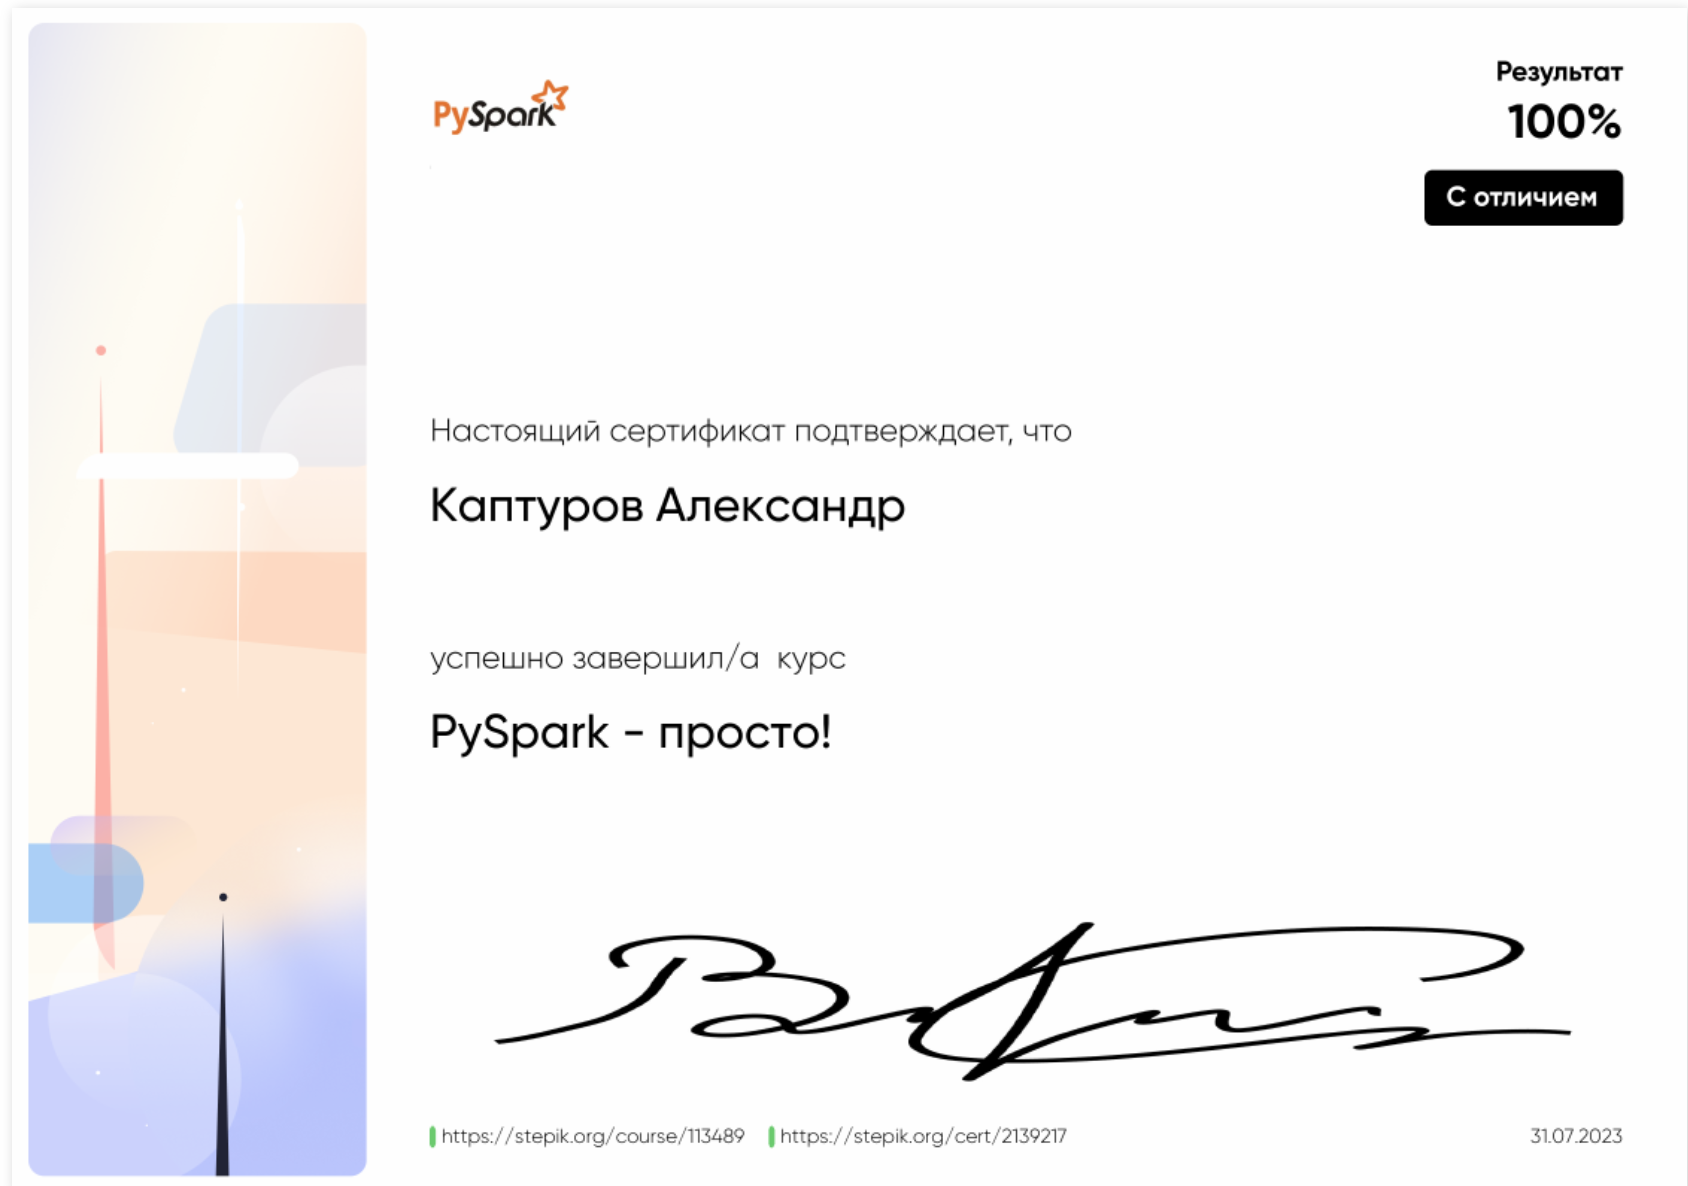

In [1]:
# Set settings to work with Spark
import findspark
findspark.init()

In [2]:
# Create Spark Session
import pyspark
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('Simple').getOrCreate()

In [3]:
# Load data
df = spark.read.csv(path='stocks_price_final.csv')
df

DataFrame[_c0: string, _c1: string, _c2: string, _c3: string, _c4: string, _c5: string, _c6: string, _c7: string, _c8: string, _c9: string, _c10: string, _c11: string, _c12: string]

In [4]:
# Show default schema (type = string)
df.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)
 |-- _c6: string (nullable = true)
 |-- _c7: string (nullable = true)
 |-- _c8: string (nullable = true)
 |-- _c9: string (nullable = true)
 |-- _c10: string (nullable = true)
 |-- _c11: string (nullable = true)
 |-- _c12: string (nullable = true)



In [5]:
# Set right schema
from pyspark.sql.types import *

data_schema = StructType([
    StructField('_c0', IntegerType(), True),
    StructField('symbol', StringType(), True),
    StructField('date', DateType(), True),
    StructField('open', DoubleType(), True),
    StructField('high', DoubleType(), True),
    StructField('low', DoubleType(), True),
    StructField('close', DoubleType(), True),
    StructField('volume', IntegerType(), True),
    StructField('adjusted', DoubleType(), True),
    StructField('market.cap', StringType(), True),
    StructField('sector', StringType(), True),
    StructField('industry', StringType(), True),
    StructField('exchange', StringType(), True)
])

data = spark.read.csv(path='stocks_price_final.csv',
                      header=True,
                      schema=data_schema)
data.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- symbol: string (nullable = true)
 |-- date: date (nullable = true)
 |-- open: double (nullable = true)
 |-- high: double (nullable = true)
 |-- low: double (nullable = true)
 |-- close: double (nullable = true)
 |-- volume: integer (nullable = true)
 |-- adjusted: double (nullable = true)
 |-- market.cap: string (nullable = true)
 |-- sector: string (nullable = true)
 |-- industry: string (nullable = true)
 |-- exchange: string (nullable = true)



In [6]:
# Attribute schema
data.schema

StructType(List(StructField(_c0,IntegerType,true),StructField(symbol,StringType,true),StructField(date,DateType,true),StructField(open,DoubleType,true),StructField(high,DoubleType,true),StructField(low,DoubleType,true),StructField(close,DoubleType,true),StructField(volume,IntegerType,true),StructField(adjusted,DoubleType,true),StructField(market.cap,StringType,true),StructField(sector,StringType,true),StructField(industry,StringType,true),StructField(exchange,StringType,true)))

In [7]:
# Attribute dtypes returns list of tuples with column names and data types
data.dtypes

[('_c0', 'int'),
 ('symbol', 'string'),
 ('date', 'date'),
 ('open', 'double'),
 ('high', 'double'),
 ('low', 'double'),
 ('close', 'double'),
 ('volume', 'int'),
 ('adjusted', 'double'),
 ('market.cap', 'string'),
 ('sector', 'string'),
 ('industry', 'string'),
 ('exchange', 'string')]

In [8]:
# Method show by default displays the first 20 rows and also takes a number 
# as a parameter to select how many of them
data.show(5)

+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|_c0|symbol|      date|     open|     high|      low|    close| volume| adjusted|market.cap|       sector|            industry|exchange|
+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|  1|   TXG|2019-09-12|     54.0|     58.0|     51.0|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  3|   TXG|2019-09-16|52.450001|     56.0|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  5|   TXG|2019-09-18|56.849998|    62.2

In [9]:
# Let's use vertical parameter
data.show(n=2, vertical=True)

-RECORD 0--------------------------
 _c0        | 1                    
 symbol     | TXG                  
 date       | 2019-09-12           
 open       | 54.0                 
 high       | 58.0                 
 low        | 51.0                 
 close      | 52.75                
 volume     | 7326300              
 adjusted   | 52.75                
 market.cap | $9.31B               
 sector     | Capital Goods        
 industry   | Biotechnology: La... 
 exchange   | NASDAQ               
-RECORD 1--------------------------
 _c0        | 2                    
 symbol     | TXG                  
 date       | 2019-09-13           
 open       | 52.75                
 high       | 54.355               
 low        | 49.150002            
 close      | 52.27                
 volume     | 1025200              
 adjusted   | 52.27                
 market.cap | $9.31B               
 sector     | Capital Goods        
 industry   | Biotechnology: La... 
 exchange   | NASDAQ        

In [10]:
# Let's display like dataframe
import pandas as pd

display(data.toPandas())

,_c0,symbol,date,open,high,low,close,volume,adjusted,market.cap,sector,industry,exchange
0,1,TXG,2019-09-12,54.000000,58.000000,51.000000,52.750000,7326300.0,52.750000,$9.31B,Capital Goods,Biotechnology: Laboratory Analytical Instruments,NASDAQ
1,2,TXG,2019-09-13,52.750000,54.355000,49.150002,52.270000,1025200.0,52.270000,$9.31B,Capital Goods,Biotechnology: Laboratory Analytical Instruments,NASDAQ
2,3,TXG,2019-09-16,52.450001,56.000000,52.009998,55.200001,269900.0,55.200001,$9.31B,Capital Goods,Biotechnology: Laboratory Analytical Instruments,NASDAQ
3,4,TXG,2019-09-17,56.209999,60.900002,55.423000,56.779999,602800.0,56.779999,$9.31B,Capital Goods,Biotechnology: Laboratory Analytical Instruments,NASDAQ
4,5,TXG,2019-09-18,56.849998,62.270000,55.650002,62.000000,1589600.0,62.000000,$9.31B,Capital Goods,Biotechnology: Laboratory Analytical Instruments,NASDAQ
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1729029,1729030,ZYME,2020-07-16,30.570000,31.670000,30.299999,31.150000,467900.0,31.150000,$1.44B,Health Care,Major Pharmaceuticals,NYSE
1729030,1729031,ZYME,2020-07-17,31.200001,33.080002,31.000000,33.029999,600800.0,33.029999,$1.44B,Health Care,Major Pharmaceuticals,NYSE
1729031,1729032,ZYME,2020-07-20,33.320000,33.320000,31.589001,32.110001,303500.0,32.110001,$1.44B,Health Care,Major Pharmaceuticals,NYSE
1729032,1729033,ZYME,2020-07-21,32.369999,32.490002,30.340000,30.650000,337900.0,30.650000,$1.44B,Health Care,Major Pharmaceuticals,NYSE


In [11]:
# Method head() displays n rows in list
data.head(5)

[Row(_c0=1, symbol='TXG', date=datetime.date(2019, 9, 12), open=54.0, high=58.0, low=51.0, close=52.75, volume=7326300, adjusted=52.75, market.cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ'),
 Row(_c0=2, symbol='TXG', date=datetime.date(2019, 9, 13), open=52.75, high=54.355, low=49.150002, close=52.27, volume=1025200, adjusted=52.27, market.cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ'),
 Row(_c0=3, symbol='TXG', date=datetime.date(2019, 9, 16), open=52.450001, high=56.0, low=52.009998, close=55.200001, volume=269900, adjusted=55.200001, market.cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ'),
 Row(_c0=4, symbol='TXG', date=datetime.date(2019, 9, 17), open=56.209999, high=60.900002, low=55.423, close=56.779999, volume=602800, adjusted=56.779999, market.cap='$9.31B', sector='Capit

In [12]:
# Method first() displays first row of data
data.first()

Row(_c0=1, symbol='TXG', date=datetime.date(2019, 9, 12), open=54.0, high=58.0, low=51.0, close=52.75, volume=7326300, adjusted=52.75, market.cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ')

In [13]:
# Method take() dispays first n rows
data.take(5)

[Row(_c0=1, symbol='TXG', date=datetime.date(2019, 9, 12), open=54.0, high=58.0, low=51.0, close=52.75, volume=7326300, adjusted=52.75, market.cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ'),
 Row(_c0=2, symbol='TXG', date=datetime.date(2019, 9, 13), open=52.75, high=54.355, low=49.150002, close=52.27, volume=1025200, adjusted=52.27, market.cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ'),
 Row(_c0=3, symbol='TXG', date=datetime.date(2019, 9, 16), open=52.450001, high=56.0, low=52.009998, close=55.200001, volume=269900, adjusted=55.200001, market.cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ'),
 Row(_c0=4, symbol='TXG', date=datetime.date(2019, 9, 17), open=56.209999, high=60.900002, low=55.423, close=56.779999, volume=602800, adjusted=56.779999, market.cap='$9.31B', sector='Capit

### Method take() display first n elements from RDD or Dataframe, but head() available only for Dataframe

In [14]:
# Method describe() displays some descriptive statistics
data.describe().show(vertical=True)

-RECORD 0--------------------------
 summary    | count                
 _c0        | 1729034              
 symbol     | 1729034              
 open       | 1726301              
 high       | 1726301              
 low        | 1726301              
 close      | 1726301              
 volume     | 1725207              
 adjusted   | 1726301              
 market.cap | 1729034              
 sector     | 1729034              
 industry   | 1729034              
 exchange   | 1729034              
-RECORD 1--------------------------
 summary    | mean                 
 _c0        | 864517.5             
 symbol     | null                 
 open       | 15070.071703341047   
 high       | 15555.067268137087   
 low        | 14557.808227578987   
 close      | 15032.71485433071    
 volume     | 1397692.1627885813   
 adjusted   | 14926.109688795501   
 market.cap | null                 
 sector     | null                 
 industry   | null                 
 exchange   | null          

In [15]:
# Attribute columns returns list with columns
data.columns

['_c0',
 'symbol',
 'date',
 'open',
 'high',
 'low',
 'close',
 'volume',
 'adjusted',
 'market.cap',
 'sector',
 'industry',
 'exchange']

In [16]:
# Method count() returns total number of rows
data.count()

1729034

In [17]:
# Method distinct() returns distinct rows from data
data.distinct().show(n=3, vertical=True)

-RECORD 0--------------------------
 _c0        | 76                   
 symbol     | TXG                  
 date       | 2019-12-30           
 open       | 78.150002            
 high       | 79.160004            
 low        | 74.540001            
 close      | 76.129997            
 volume     | 149600               
 adjusted   | 76.129997            
 market.cap | $9.31B               
 sector     | Capital Goods        
 industry   | Biotechnology: La... 
 exchange   | NASDAQ               
-RECORD 1--------------------------
 _c0        | 96                   
 symbol     | TXG                  
 date       | 2020-01-29           
 open       | 107.779999           
 high       | 108.359001           
 low        | 98.029999            
 close      | 99.290001            
 volume     | 284800               
 adjusted   | 99.290001            
 market.cap | $9.31B               
 sector     | Capital Goods        
 industry   | Biotechnology: La... 
 exchange   | NASDAQ        

In [18]:
# Let's display count of unique rows
data.distinct().count()

1729034

# Task 1
1. Read the dataset already familiar to us **stocks_price_final**;
2. Create a new column **new_volume** at the end with the data from the **volum** column;
3. Get rid of the following columns: **symbol, close, volume, adjusted, market.cap, exchange**;
4. Swap the names of the columns **high** and **low**;
5. Move the **date** column to the end;
6. Output the first line copy it completely and paste it into the answer;

In [19]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.types import *

spark = SparkSession.builder.appName('Task 1').getOrCreate()

data_schema = StructType([
    StructField('_c0', IntegerType(), nullable=True),
    StructField('symbol', StringType(), nullable=True),
    StructField('date', DateType(), True),
    StructField('open', DoubleType(), True),
    StructField('high', DoubleType(), True),
    StructField('low', DoubleType(), True),
    StructField('close', DoubleType(), True),
    StructField('volume', IntegerType(), True),
    StructField('adjusted', DoubleType(), True),
    StructField('market.cap', StringType(), True),
    StructField('sector', StringType(), True),
    StructField('industry', StringType(), True),
    StructField('exchange', StringType(), True)
])

# 1. Read dataset
data = spark.read.csv(path='stocks_price_final.csv', header=True, schema=data_schema)
data.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- symbol: string (nullable = true)
 |-- date: date (nullable = true)
 |-- open: double (nullable = true)
 |-- high: double (nullable = true)
 |-- low: double (nullable = true)
 |-- close: double (nullable = true)
 |-- volume: integer (nullable = true)
 |-- adjusted: double (nullable = true)
 |-- market.cap: string (nullable = true)
 |-- sector: string (nullable = true)
 |-- industry: string (nullable = true)
 |-- exchange: string (nullable = true)



In [20]:
# 2. Create new column
data = data.withColumn('new_volume', data['volume'])
data.columns

['_c0',
 'symbol',
 'date',
 'open',
 'high',
 'low',
 'close',
 'volume',
 'adjusted',
 'market.cap',
 'sector',
 'industry',
 'exchange',
 'new_volume']

In [21]:
# 3. Drop some columns
data = data.drop('symbol', 'close', 'volume', 'adjusted', 'market.cap', 'exchange')
data.columns

['_c0', 'date', 'open', 'high', 'low', 'sector', 'industry', 'new_volume']

# [PySpark – Drop One or Multiple Columns From DataFrame](https://sparkbyexamples.com/pyspark/pyspark-drop-column-from-dataframe/)

In [22]:
# 4. Rename Columns' names
data = data.withColumnRenamed('high', 'intermediate') \
    .withColumnRenamed('low', 'high') \
    .withColumnRenamed('intermediate', 'low')
data.columns

['_c0', 'date', 'open', 'low', 'high', 'sector', 'industry', 'new_volume']

In [23]:
# 5. Move 'data' column in the end of columns
data = data.withColumn('new_date', data['date']) \
    .drop('date') \
    .withColumnRenamed('new_date', 'date')
data.columns

['_c0', 'open', 'low', 'high', 'sector', 'industry', 'new_volume', 'date']

In [24]:
# 6. Display first row
data.show(1)

+---+----+----+----+-------------+--------------------+----------+----------+
|_c0|open| low|high|       sector|            industry|new_volume|      date|
+---+----+----+----+-------------+--------------------+----------+----------+
|  1|54.0|58.0|51.0|Capital Goods|Biotechnology: La...|   7326300|2019-09-12|
+---+----+----+----+-------------+--------------------+----------+----------+
only showing top 1 row



### Answer is:

|  1|54.0|58.0|51.0|Capital Goods|Biotechnology: La...|   7326300|2019-09-12|

# How to work with NaN values

```Python
from pyspark.sql import functions

# Remove lines with nan values:
data.na.drop()

# Replase nan values:
data.na.fill(data.select(functions.mean(data['open'])).collect()[0][0])

# Replace nan values using other values:
data.na.replace(old_value, new_value)
```

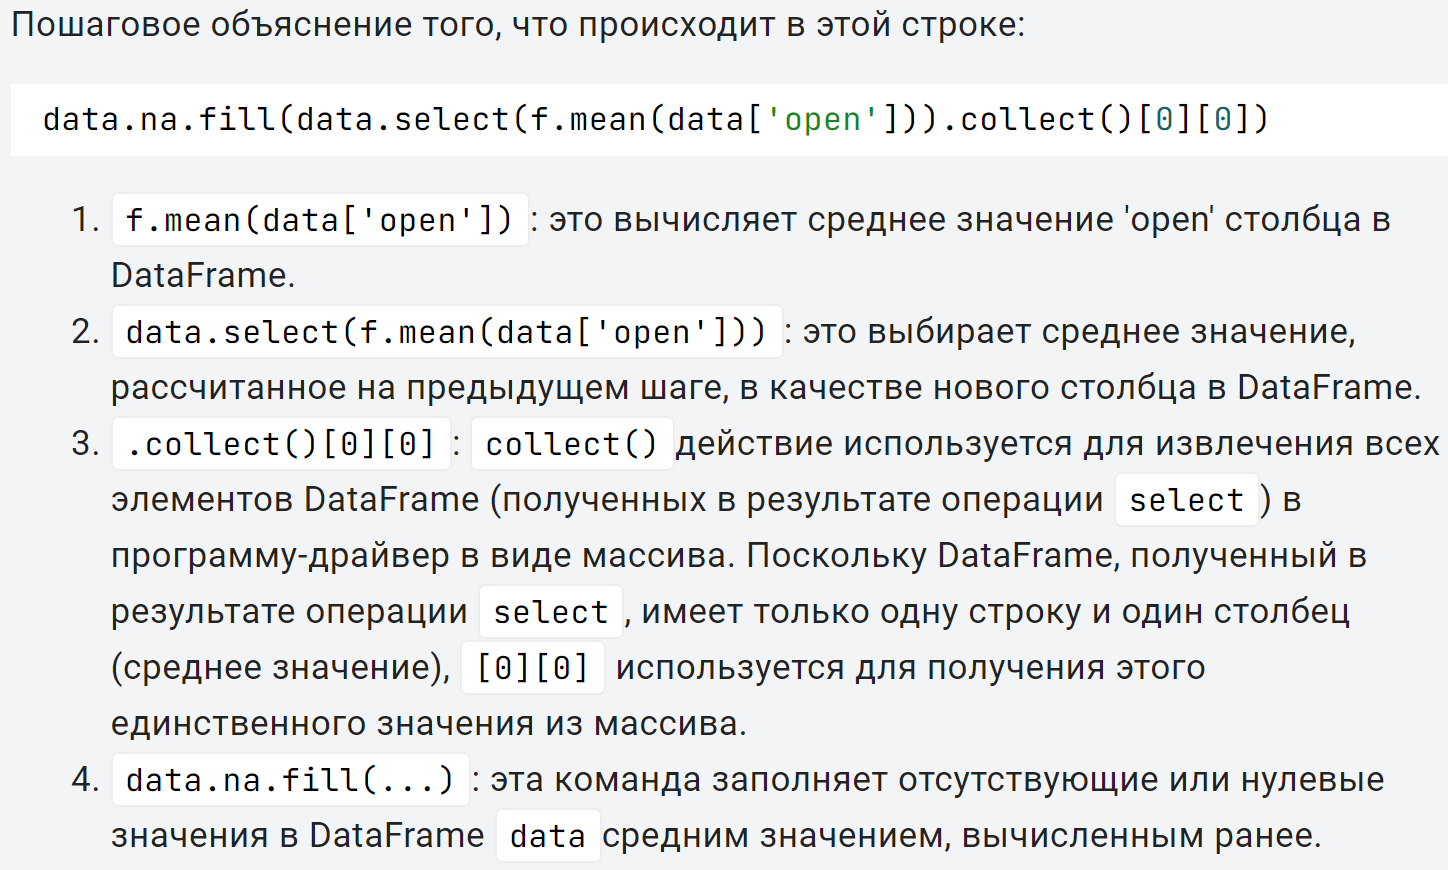

# Task 2
1. Read the dataset already familiar to us **stocks_price_final**;
2. Calculate the difference between the original number of rows in the dataset and the number of rows after removing missing values.

In [25]:
# This code was given by author
data_schema = [
               StructField('_c0', IntegerType(), nullable=True),
               StructField('symbol', StringType(), True),
               StructField('date', DateType(), True),
               StructField('open', DoubleType(), True),
               StructField('high', DoubleType(), True),
               StructField('low', DoubleType(), True),
               StructField('close', DoubleType(), True),
               StructField('volume', IntegerType(), True),
               StructField('adjusted', DoubleType(), True),
               StructField('market.cap', StringType(), True),
               StructField('sector', StringType(), True),
               StructField('industry', StringType(), True),
               StructField('exchange', StringType(), True),
            ]

final_struc = StructType(fields = data_schema)

data = spark.read.csv('stocks_price_final.csv', sep=',', header=True, schema=final_struc).withColumnRenamed('market.cap','market_cap')

In [26]:
before = data.count()
after = data.na.drop().count()
print(before - after)

3827


In [27]:
# Select data from one or several columns
data.select('sector').show(5)
data.select(['open', 'close', 'adjusted']).show(5)

+-------------+
|       sector|
+-------------+
|Capital Goods|
|Capital Goods|
|Capital Goods|
|Capital Goods|
|Capital Goods|
+-------------+
only showing top 5 rows

+---------+---------+---------+
|     open|    close| adjusted|
+---------+---------+---------+
|     54.0|    52.75|    52.75|
|    52.75|    52.27|    52.27|
|52.450001|55.200001|55.200001|
|56.209999|56.779999|56.779999|
|56.849998|     62.0|     62.0|
+---------+---------+---------+
only showing top 5 rows



In [28]:
# Filter
from pyspark.sql.functions import col, lit

data.filter(
    (col('date') >= lit('2020-01-01')) & \
    (col('date') <= lit('2020-01-31'))
).show(5)

+---+------+----------+---------+---------+---------+---------+------+---------+----------+-------------+--------------------+--------+
|_c0|symbol|      date|     open|     high|      low|    close|volume| adjusted|market_cap|       sector|            industry|exchange|
+---+------+----------+---------+---------+---------+---------+------+---------+----------+-------------+--------------------+--------+
| 78|   TXG|2020-01-02|76.910004|77.989998|71.480003|72.830002|220200|72.830002|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
| 79|   TXG|2020-01-03|71.519997|76.188004|70.580002|75.559998|288300|75.559998|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
| 80|   TXG|2020-01-06|75.269997|77.349998|73.559998|75.550003|220600|75.550003|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
| 81|   TXG|2020-01-07|     76.0|77.279999|    75.32|75.980003|182400|75.980003|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
| 82|   TXG|2020-01-08|76.089996|76.949997|72.73

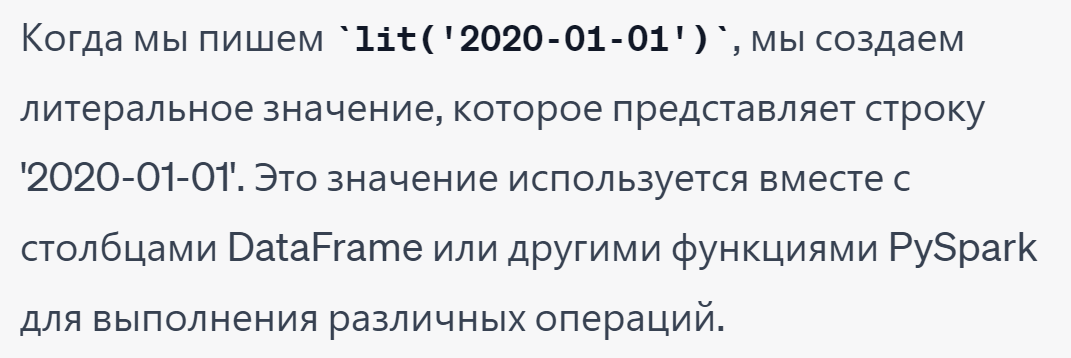

In [29]:
# Between. This method returns True if the value being checked belongs to the specified range, otherwise False
data.filter(data.adjusted.between(100.0, 500.0)).show(1)

+---+------+----------+---------+-----+---------+----------+------+----------+----------+-------------+--------------------+--------+
|_c0|symbol|      date|     open| high|      low|     close|volume|  adjusted|market_cap|       sector|            industry|exchange|
+---+------+----------+---------+-----+---------+----------+------+----------+----------+-------------+--------------------+--------+
| 93|   TXG|2020-01-24|95.459999|101.0|94.157997|100.790001|328100|100.790001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
+---+------+----------+---------+-----+---------+----------+------+----------+----------+-------------+--------------------+--------+
only showing top 1 row



In [30]:
# When
from pyspark.sql.functions import when

data.select('open', 'close',
            when(data.adjusted >= 200.0, 1).otherwise(0).alias('case')
).show(5)

+---------+---------+----+
|     open|    close|case|
+---------+---------+----+
|     54.0|    52.75|   0|
|    52.75|    52.27|   0|
|52.450001|55.200001|   0|
|56.209999|56.779999|   0|
|56.849998|     62.0|   0|
+---------+---------+----+
only showing top 5 rows



It returns 0 or 1 depending on the given condition. The example below shows how to select open and close prices where the adjusted price was greater than or equal to 200.

In [31]:
# Like (^[B,C] - regex begins from B or C)
data.select('sector',
           data.sector.rlike('^[B,C]').alias('Begins from B or C')
).distinct().show()

+--------------------+------------------+
|              sector|Begins from B or C|
+--------------------+------------------+
|         Health Care|             false|
|       Capital Goods|              true|
|Consumer Non-Dura...|              true|
|    Public Utilities|             false|
|   Consumer Durables|              true|
|             Finance|             false|
|      Transportation|             false|
|       Miscellaneous|             false|
|   Consumer Services|              true|
|              Energy|             false|
|    Basic Industries|              true|
|          Technology|             false|
+--------------------+------------------+



In [32]:
# GroupBy (parentheses are used to avoid '\' in the end of each line)
(data.select(['industry', 'open', 'close', 'adjusted'])
    .groupBy('industry')
    .mean()
    .show(1)
)

+--------------------+-----------------+-----------------+-----------------+
|            industry|        avg(open)|       avg(close)|    avg(adjusted)|
+--------------------+-----------------+-----------------+-----------------+
|Finance/Investors...|5.134401785714288|5.136630739795919|4.991354066964286|
+--------------------+-----------------+-----------------+-----------------+
only showing top 1 row



In [33]:
# Aggregation
from pyspark.sql.functions import min, max, avg

(data.groupBy('sector')
    .agg(
        min('close').alias('min close price'),
        max('close').alias('max close price'),
        avg('close').alias('avg close price')
    ).show(n=5, truncate=False)
)

+---------------------+---------------+---------------+------------------+
|sector               |min close price|max close price|avg close price   |
+---------------------+---------------+---------------+------------------+
|Miscellaneous        |0.1361         |1035.829956    |52.063628549509616|
|Health Care          |0.071          |187000.0       |119.07806125419022|
|Public Utilities     |0.325          |282.220001     |35.58528245861939 |
|Energy               |0.09           |901.039978     |24.427350302157947|
|Consumer Non-Durables|0.12           |664.130005     |43.33038601364589 |
+---------------------+---------------+---------------+------------------+
only showing top 5 rows



# Task 3
Print the first 5 lines by copying the output and pasting it into the response;

The resulting table should contain the following columns:
```Python
+---+-----+
|age|count|
+---+-----+
```

In [34]:
# Open data for tasks 3-6
pyspark = spark.read.csv(path='bank.csv', sep=';', header=True)

In [35]:
display(pyspark.toPandas())

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [36]:
from pyspark.sql.functions import count

(pyspark.select('age')
                .groupBy('age')
                .agg(
                    count('age').alias('count')
                ).show(n=5)
)

+---+-----+
|age|count|
+---+-----+
| 51|   91|
| 54|   71|
| 29|   97|
| 69|    6|
| 42|  141|
+---+-----+
only showing top 5 rows



# Task 4

Find out the employees with what age work in the bank most often.

**Note**

Output the first 5 rows, copy the output and paste it into the response (include "only showing top 5 rows" in the response);

The resulting table should contain the following columns:
```Python
+---+-----+
|age|count|
+---+-----+
```

In [37]:
(pyspark.select('age')
                .groupBy('age')
                .agg(
                    count('age').alias('count'))
                .orderBy(col('count').desc())
                .show(n=5)
)

+---+-----+
|age|count|
+---+-----+
| 34|  231|
| 32|  224|
| 31|  199|
| 36|  188|
| 33|  186|
+---+-----+
only showing top 5 rows



# Task 5

It is necessary to find the age and number of the youngest bank employees

**Note**

Output the first 5 rows, copy the output and paste it into the response (include "only showing top 5 rows" in the response);

The resulting table should contain the following columns:
```Python
+---+-----+
|age|count|
+---+-----+
```

In [38]:
(pyspark.select('age')
                .groupBy('age')
                .agg(
                    count('age').alias('count'))
                .orderBy(col('age').asc())
                .show(n=5)
)

+---+-----+
|age|count|
+---+-----+
| 19|    4|
| 20|    3|
| 21|    7|
| 22|    9|
| 23|   20|
+---+-----+
only showing top 5 rows



# Task 6

It is necessary to display the age and number of employees who are over 30 years old. Sort the resulting table by the age column in ascending order.

Note

Output the first 5 rows, copy the output and paste it into the response (include "only showing top 5 rows" in the response);

The resulting table should contain the following columns:
```Python
+---+-----+
|age|count|
+---+-----+
```

In [39]:
# Solution
(pyspark
    .filter(pyspark.age > 30)
    .select('age')
    .groupBy('age')
    .agg(
        count('age').alias('count'))
    .orderBy(
        col('age').asc())
    .show(n=5)
)

+---+-----+
|age|count|
+---+-----+
| 31|  199|
| 32|  224|
| 33|  186|
| 34|  231|
| 35|  180|
+---+-----+
only showing top 5 rows



# Task 7

Find the number of works published since 1951, whose authors include "Sergei Rachmaninoff".

**Note**

The column about the time of release of works, use the one that contains more complete data.

Code to initialize DataFrame:
```Python
schema = StructType(
    [
        StructField("id", StringType(), nullable=True),
        StructField("name", StringType(), True),
        StructField("artists", StringType(), True),
        StructField("duration_ms", DoubleType(), True),
        StructField("release_date", DateType(), True),
        StructField("year", IntegerType(), True),
        StructField("acousticness", StringType(), True),
        StructField("danceability", StringType(), True),
        StructField("energy", StringType(), True),
        StructField("instrumentalness", StringType(), True),
        StructField("liveness", StringType(), True),
        StructField("loudness", StringType(), True),
        StructField("speechiness", StringType(), True),
        StructField("tempo", StringType(), True),
        StructField("valence", StringType(), True),
        StructField("mode", StringType(), True),
        StructField("key", StringType(), True),
        StructField("popularity", DoubleType(), True),
        StructField("explicit", StringType(), True),
    ]
)

spotify = (
    spark.read.option("delimiter", ",")
    .option("header", True)
    .option("escape", '"')
    .schema(schema)
    .csv("data.csv")
)
```

In [40]:
# Code to initialize DataFrame:
schema = StructType(
    [
        StructField("id", StringType(), nullable=True),
        StructField("name", StringType(), True),
        StructField("artists", StringType(), True),
        StructField("duration_ms", DoubleType(), True),
        StructField("release_date", DateType(), True),
        StructField("year", IntegerType(), True),
        StructField("acousticness", StringType(), True),
        StructField("danceability", StringType(), True),
        StructField("energy", StringType(), True),
        StructField("instrumentalness", StringType(), True),
        StructField("liveness", StringType(), True),
        StructField("loudness", StringType(), True),
        StructField("speechiness", StringType(), True),
        StructField("tempo", StringType(), True),
        StructField("valence", StringType(), True),
        StructField("mode", StringType(), True),
        StructField("key", StringType(), True),
        StructField("popularity", DoubleType(), True),
        StructField("explicit", StringType(), True),
    ]
)

spotify = (
    spark.read.option("delimiter", ",")
    .option("header", True)
    .option("escape", '"')
    .schema(schema)
    .csv("data.csv")
)

In [41]:
# Solution
(spotify
    .filter(spotify.year >= 1951)
    .filter(col('artists')
           .like('%Sergei Rachmaninoff%'))
    .count()
)    

46

# Task 8

Display the change in the average values of audio characteristics from year to year.

These characteristics are **acousticness, danceability, energy, speechiness, liveness and valence**. Sort the resulting table by the year column in ascending order. Average values ​​are rounded up to 2 decimal places.

**Note**

Output the first 5 lines,
copy the output and paste it into the answer (include "only showing top 5 rows" in the answer);

The resulting table should have the following column names:

```Python
+----+------------+------------+------+--------+-----------+-------+
|year|acousticness|danceability|energy|liveness|speechiness|valence|
+----+------------+------------+------+--------+-----------+-------+
```

In [42]:
from pyspark.sql.functions import round

(spotify.select(['year', 'acousticness', 'danceability', 'energy', 'liveness', 'speechiness', 'valence'])
    .groupBy('year')
    .agg(
        round(avg('acousticness'), 2).alias('acousticness'),
        round(avg('danceability'), 2).alias('danceability'),
        round(avg('energy'), 2).alias('energy'),
        round(avg('liveness'), 2).alias('liveness'),
        round(avg('speechiness'), 2).alias('speechiness'),
        round(avg('valence'), 2).alias('valence')
    )
    .orderBy('year')
    .show(5)
)

+----+------------+------------+------+--------+-----------+-------+
|year|acousticness|danceability|energy|liveness|speechiness|valence|
+----+------------+------------+------+--------+-----------+-------+
|1921|         0.9|        0.43|  0.24|    0.22|       0.08|   0.43|
|1922|        0.94|        0.48|  0.24|    0.24|       0.12|   0.53|
|1923|        0.98|        0.57|  0.25|    0.24|        0.1|   0.62|
|1924|        0.94|        0.55|  0.35|    0.24|       0.09|   0.67|
|1925|        0.97|        0.57|  0.26|    0.24|       0.12|   0.62|
+----+------------+------------+------+--------+-----------+-------+
only showing top 5 rows

